# The adverse health effects of air pollution - are we making any progress?

<img src=files/air.jpg width="900">

**Credit:**  [Flickr/E4C](https://www.flickr.com/people/44221799@N08/) 

In [55]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

## Introduction

**Business Context.** Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as *coal*. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      

For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of **plausible impacts of air contamination on the health of the global population**. They have gathered some *raw* data provided by the [World Health Organization](https://www.who.int/), [The Institute for Health Metrics and Evaluation](http://www.healthdata.org/) and the [World Bank Group](https://www.worldbank.org/). Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. 

**Analytical Context.** You are given a folder, named ```files``` with *raw* data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:

1. Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. 
2. Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.

Additionally, the client has some broad questions they would like to answer:
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
2. Which are the critical regions where we should start environmental campaigns?
3. Are we making any progress in the prevention of deaths related to air pollution?
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? 

## Extracting and cleaning relevant data

Let's take a look at the data provided by the client in the ```files``` folder. There, we see another folder  named ```WDI_csv``` with several CSV files corresponding to the World Bank's primary [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators). The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. 

Let's take a peek at the file ```WDIData.csv```:

In [56]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info(verbose=True))
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say ```Arab World```, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with ```NaN``` values for each year column.

Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file ```WDISeries.csv``` which seems to contain more information about the indicators:

In [57]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


Bingo! The ```WDI_ids``` DataFrame contains a column named ```Topic```. Moreover, it seems that *Environment* is listed as a key topic in the column.

### Exercise 1:

Extract all the rows that have the topic key *Environment* in ```WDI_ids```. Add to the resulting DataFrame a new column named ```Subtopic``` which contains the corresponding subtopic of the indicator. For example, the subtopic of ```Environment: Agricultural production``` is ```Agricultural production```. Which subtopics do you think are of interest to us?

**Hint:** Remember that you can apply string methods to Series using the ```str()``` method of ```pandas```. 

In [58]:
env_topics = WDI_ids.Topic.unique()
env_list = list()
for topic in env_topics:
    if "Environment" in topic:
        print(topic)
        env_list.append(topic)

print(env_list)

Environment: Agricultural production
Environment: Land use
Environment: Energy production & use
Environment: Emissions
Environment: Biodiversity & protected areas
Environment: Density & urbanization
Environment: Freshwater
Environment: Natural resources contribution to GDP
['Environment: Agricultural production', 'Environment: Land use', 'Environment: Energy production & use', 'Environment: Emissions', 'Environment: Biodiversity & protected areas', 'Environment: Density & urbanization', 'Environment: Freshwater', 'Environment: Natural resources contribution to GDP']


In [94]:
for i in range(0,len(env_list)):
    print(env_list[i])
    if i == 0:
        env_df = WDI_ids.loc[WDI_ids["Topic"]==env_list[0]]
    else:
        env_df = env_df.append(pd.DataFrame(WDI_ids.loc[WDI_ids["Topic"]==env_list[i]]))
env_df["Subtopic"] =  env_df["Topic"].apply(lambda x: x.split(':')[1].replace(" ", ""))
print(env_df.Subtopic.unique())
env_df.head()

Environment: Agricultural production
Environment: Land use
Environment: Energy production & use
Environment: Emissions
Environment: Biodiversity & protected areas
Environment: Density & urbanization
Environment: Freshwater
Environment: Natural resources contribution to GDP
['Agriculturalproduction' 'Landuse' 'Energyproduction&use' 'Emissions'
 'Biodiversity&protectedareas' 'Density&urbanization' 'Freshwater'
 'NaturalresourcescontributiontoGDP']


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Subtopic
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Agriculturalproduction
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agriculturalproduction
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agriculturalproduction
8,AG.LND.CREL.HA,Environment: Agricultural production,Land under cereal production (hectares),NaN,Land under cereal production refers to harvest...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...","Cereals production includes wheat, rice, maize...",The cultivation of cereals varies widely in di...,NaN,NaN,NaN,CC BY-4.0,NaN,Agriculturalproduction
22,AG.LND.TRAC.ZS,Environment: Agricultural production,"Agricultural machinery, tractors per 100 sq. k...",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Agriculturalproduction


**Answer.**
Given the subtopics, it is most likely that we are interested in:

Emissions: as it's the main indicator of how much pollution is thrown to the environment.

Density & Urbanization: because it might give us a hint of how the differently populated areas contribute to the emission and pollution.

Biodivertsity & protected areas: might be of interest to contrast how the emission and this indicator correlate over time, thus altering the environment and it's capacity to resist the pollution.

-------

We may find several of these subtopics relevant to our study, but probably the most interesting for us now is the ```Emissions``` subtopic.

### Exercise 2:

Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame ```Emissions_df```. How many emissions indicators are in the study?

In [111]:
emissions = env_df[env_df["Subtopic"]=="Emissions"]
ind_code = emissions["Series Code"].unique()
print(ind_code, len(ind_code))
emissions

['EN.ATM.CO2E.EG.ZS' 'EN.ATM.CO2E.GF.KT' 'EN.ATM.CO2E.GF.ZS'
 'EN.ATM.CO2E.KD.GD' 'EN.ATM.CO2E.KT' 'EN.ATM.CO2E.LF.KT'
 'EN.ATM.CO2E.LF.ZS' 'EN.ATM.CO2E.PC' 'EN.ATM.CO2E.PP.GD'
 'EN.ATM.CO2E.PP.GD.KD' 'EN.ATM.CO2E.SF.KT' 'EN.ATM.CO2E.SF.ZS'
 'EN.ATM.GHGO.KT.CE' 'EN.ATM.GHGO.ZG' 'EN.ATM.GHGT.KT.CE' 'EN.ATM.GHGT.ZG'
 'EN.ATM.HFCG.KT.CE' 'EN.ATM.METH.AG.KT.CE' 'EN.ATM.METH.AG.ZS'
 'EN.ATM.METH.EG.KT.CE' 'EN.ATM.METH.EG.ZS' 'EN.ATM.METH.KT.CE'
 'EN.ATM.METH.ZG' 'EN.ATM.NOXE.AG.KT.CE' 'EN.ATM.NOXE.AG.ZS'
 'EN.ATM.NOXE.EG.KT.CE' 'EN.ATM.NOXE.EG.ZS' 'EN.ATM.NOXE.KT.CE'
 'EN.ATM.NOXE.ZG' 'EN.ATM.PFCG.KT.CE' 'EN.ATM.PM25.MC.M3'
 'EN.ATM.PM25.MC.T1.ZS' 'EN.ATM.PM25.MC.T2.ZS' 'EN.ATM.PM25.MC.T3.ZS'
 'EN.ATM.PM25.MC.ZS' 'EN.ATM.SF6G.KT.CE' 'EN.CLC.GHGR.MT.CE'
 'EN.CO2.BLDG.ZS' 'EN.CO2.ETOT.ZS' 'EN.CO2.MANF.ZS' 'EN.CO2.OTHX.ZS'
 'EN.CO2.TRAN.ZS'] 42


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Subtopic
217,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...",Carbon intensity is the ratio of carbon dioxid...,Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
218,EN.ATM.CO2E.GF.KT,Environment: Emissions,CO2 emissions from gaseous fuel consumption (kt),NaN,Carbon dioxide emissions from liquid fuel cons...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
219,EN.ATM.CO2E.GF.ZS,Environment: Emissions,CO2 emissions from gaseous fuel consumption (%...,NaN,Carbon dioxide emissions from liquid fuel cons...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
220,EN.ATM.CO2E.KD.GD,Environment: Emissions,CO2 emissions (kg per 2010 US$ of GDP),NaN,Carbon dioxide emissions are those stemming fr...,NaN,Annual,2010,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
221,EN.ATM.CO2E.KT,Environment: Emissions,CO2 emissions (kt),NaN,Carbon dioxide emissions are those stemming fr...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
222,EN.ATM.CO2E.LF.KT,Environment: Emissions,CO2 emissions from liquid fuel consumption (kt),NaN,Carbon dioxide emissions from liquid fuel cons...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
223,EN.ATM.CO2E.LF.ZS,Environment: Emissions,CO2 emissions from liquid fuel consumption (% ...,NaN,Carbon dioxide emissions from liquid fuel cons...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
224,EN.ATM.CO2E.PC,Environment: Emissions,CO2 emissions (metric tons per capita),NaN,Carbon dioxide emissions are those stemming fr...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
225,EN.ATM.CO2E.PP.GD,Environment: Emissions,CO2 emissions (kg per PPP $ of GDP),NaN,Carbon dioxide emissions are those stemming fr...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions
226,EN.ATM.CO2E.PP.GD.KD,Environment: Emissions,CO2 emissions (kg per 2011 PPP $ of GDP),NaN,Carbon dioxide emissions are those stemming fr...,NaN,Annual,2011,NaN,Weighted average,...,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN,Emissions


In [119]:
for i in range(len(ind_code)):
    if i == 0:
        Emissions_df = WDI_data[WDI_data["Indicator Code"]==ind_code[i]]
    else:
        Emissions_df = Emissions_df.append(WDI_data[WDI_data["Indicator Code"]==ind_code[i]])    

# WDI_data[WDI_data["Indicator Code"]==ind_code[0]]
Emissions_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
207,Arab World,ARB,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.757789,2.769331,2.740288,2.805363,NaN,NaN,NaN,NaN,NaN,NaN
1636,Caribbean small states,CSS,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.436703,2.418799,2.440773,2.414172,NaN,NaN,NaN,NaN,NaN,NaN
3065,Central Europe and the Baltics,CEB,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,3.687416,3.655012,3.618671,3.794636,3.843568,3.849830,...,2.602340,2.534722,2.526103,2.488878,NaN,NaN,NaN,NaN,NaN,NaN
4494,Early-demographic dividend,EAR,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,1.573502,1.600326,1.824881,1.820932,2.006848,1.983132,...,2.577213,2.612488,2.528733,2.545232,NaN,NaN,NaN,NaN,NaN,NaN
5923,East Asia & Pacific,EAS,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,2.858775,3.003296,2.964203,2.906594,2.894158,2.898215,...,3.147320,3.143591,3.091471,3.058869,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370317,Virgin Islands (U.S.),VIR,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371746,West Bank and Gaza,PSE,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373175,"Yemen, Rep.",YEM,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.651405,31.458094,34.798995,34.629803,NaN,NaN,NaN,NaN,NaN,NaN
374604,Zambia,ZMB,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.373737,33.455882,34.385965,35.109718,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
Emissions_df["Indicator Name"].unique()
Emissions_df["Indicator Name"].unique().shape

(42,)

**Answer.**
We have 42 different indicators dealing with Emissions which is coincident with the number of Emissions indicator in the WDI_ids data.

-------

### Exercise 3:

The DataFrame ```Emissions_df``` has one column per year of observation. Data in this form is usually referred to as data in *wide format*, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, *each observation will be represented by a single row*. Use the ```pandas``` function [```melt()```](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to reshape the ```Emissions_df``` data into *long format*. The resulting DataFrame should contain a pair of new columns named ```Year``` and ```Indicator Value```:

In [121]:
Emissions_df = pd.melt(Emissions_df, id_vars=["Country Name","Indicator Name","Country Code", "Indicator Code"], var_name = "Year", value_name = "Indicator Value")

**Answer.**

In [122]:
Emissions_df

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value
0,Arab World,CO2 intensity (kg per kg of oil equivalent ene...,ARB,EN.ATM.CO2E.EG.ZS,1960,NaN
1,Caribbean small states,CO2 intensity (kg per kg of oil equivalent ene...,CSS,EN.ATM.CO2E.EG.ZS,1960,NaN
2,Central Europe and the Baltics,CO2 intensity (kg per kg of oil equivalent ene...,CEB,EN.ATM.CO2E.EG.ZS,1960,3.687416
3,Early-demographic dividend,CO2 intensity (kg per kg of oil equivalent ene...,EAR,EN.ATM.CO2E.EG.ZS,1960,1.573502
4,East Asia & Pacific,CO2 intensity (kg per kg of oil equivalent ene...,EAS,EN.ATM.CO2E.EG.ZS,1960,2.858775
...,...,...,...,...,...,...
676363,Virgin Islands (U.S.),CO2 emissions from transport (% of total fuel ...,VIR,EN.CO2.TRAN.ZS,Unnamed: 64,NaN
676364,West Bank and Gaza,CO2 emissions from transport (% of total fuel ...,PSE,EN.CO2.TRAN.ZS,Unnamed: 64,NaN
676365,"Yemen, Rep.",CO2 emissions from transport (% of total fuel ...,YEM,EN.CO2.TRAN.ZS,Unnamed: 64,NaN
676366,Zambia,CO2 emissions from transport (% of total fuel ...,ZMB,EN.CO2.TRAN.ZS,Unnamed: 64,NaN


-------

### Exercise 4:

The column ```Indicator Value``` of the new ```Emissions_df``` contains a bunch of ```NaN``` values. Additionally, the ```Year``` column contains an ```Unnamed: 64``` value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.

In [127]:
Emissions_df = Emissions_df[Emissions_df["Year"]!= "Unnamed: 64"]
Emissions_df = Emissions_df.dropna(subset=["Indicator Value"])

**Answer.**

In [128]:
Emissions_df

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value
2,Central Europe and the Baltics,CO2 intensity (kg per kg of oil equivalent ene...,CEB,EN.ATM.CO2E.EG.ZS,1960,3.687416
3,Early-demographic dividend,CO2 intensity (kg per kg of oil equivalent ene...,EAR,EN.ATM.CO2E.EG.ZS,1960,1.573502
4,East Asia & Pacific,CO2 intensity (kg per kg of oil equivalent ene...,EAS,EN.ATM.CO2E.EG.ZS,1960,2.858775
8,Europe & Central Asia,CO2 intensity (kg per kg of oil equivalent ene...,ECS,EN.ATM.CO2E.EG.ZS,1960,3.320837
9,Europe & Central Asia (excluding high income),CO2 intensity (kg per kg of oil equivalent ene...,ECA,EN.ATM.CO2E.EG.ZS,1960,1.573502
...,...,...,...,...,...,...
641252,West Bank and Gaza,"PM2.5 air pollution, population exposed to lev...",PSE,EN.ATM.PM25.MC.ZS,2017,100.000000
641253,"Yemen, Rep.","PM2.5 air pollution, population exposed to lev...",YEM,EN.ATM.PM25.MC.ZS,2017,100.000000
641254,Zambia,"PM2.5 air pollution, population exposed to lev...",ZMB,EN.ATM.PM25.MC.ZS,2017,100.000000
641255,Zimbabwe,"PM2.5 air pollution, population exposed to lev...",ZWE,EN.ATM.PM25.MC.ZS,2017,100.000000


-------

### Exercise 5:

Split the ```Emissions_df``` into two DataFrames, one containing only countries and the other containing only regions. Name these ```Emissions_C_df``` and ```Emissions_R_df``` respectively.

**Hint:** You may want to inspect the file ```WDICountry.csv``` for this task. Region country codes may be found by looking at ```null``` values of the ```Region``` column in ```WDICountry```.

In [129]:
WDI_ctry = pd.read_csv("./files/WDI_csv/WDICountry.csv")
print(WDI_ctry.columns)
print(WDI_ctry.info(verbose=True))
WDI_ctry.head()

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 31 columns):
 #   Column                                 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN


In [141]:
region_list = WDI_ctry[WDI_ctry["Region"].isnull()]["Country Code"].values
country_list = WDI_ctry[pd.notna(WDI_ctry["Region"])]["Country Code"].values
print(region_list, region_list.shape[0])
print(country_list, country_list.shape[0])

#Checking we have all the possible country codes
region_list.shape[0] + country_list.shape[0] == WDI_ctry.shape[0]

#Checking there are as many country codes here as unique ones in Emissions
Emissions_df["Country Code"].unique().shape[0] == WDI_ctry.shape[0]

['ARB' 'CEB' 'CSS' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'EMU' 'EUU' 'FCS' 'HIC'
 'HPC' 'IBD' 'IBT' 'IDA' 'IDB' 'IDX' 'LAC' 'LCN' 'LDC' 'LIC' 'LMC' 'LMY'
 'LTE' 'MEA' 'MIC' 'MNA' 'NAC' 'OED' 'OSS' 'PRE' 'PSS' 'PST' 'SAS' 'SSA'
 'SSF' 'SST' 'TEA' 'TEC' 'TLA' 'TMN' 'TSA' 'TSS' 'UMC' 'WLD'] 46
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM'
 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB'
 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND'
 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA'
 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA

True

In [147]:
for i in range(len(country_list)):
    if i == 0:
        Emissions_C_df = Emissions_df[Emissions_df["Country Code"]==country_list[i]]
    else:
        Emissions_C_df = Emissions_C_df.append(Emissions_df[Emissions_df["Country Code"]==country_list[i]])

for i in range(len(region_list)):      
    if i == 0:
        Emissions_R_df = Emissions_df[Emissions_df["Country Code"]==region_list[i]]
    else:
        Emissions_R_df = Emissions_R_df.append(Emissions_df[Emissions_df["Country Code"]==region_list[i]])

**Answer.**

In [148]:
Emissions_C_df

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value
104336,Aruba,Agricultural methane emissions (thousand metri...,ABW,EN.ATM.METH.AG.KT.CE,1969,0.000000
104864,Aruba,Methane emissions in energy sector (thousand m...,ABW,EN.ATM.METH.EG.KT.CE,1969,0.000000
105920,Aruba,Agricultural nitrous oxide emissions (thousand...,ABW,EN.ATM.NOXE.AG.KT.CE,1969,0.000000
106448,Aruba,Nitrous oxide emissions in energy sector (thou...,ABW,EN.ATM.NOXE.EG.KT.CE,1969,0.000000
114104,Aruba,"Other greenhouse gas emissions, HFC, PFC and S...",ABW,EN.ATM.GHGO.KT.CE,1970,19.667901
...,...,...,...,...,...,...
640199,Zimbabwe,"PM2.5 air pollution, mean annual exposure (mic...",ZWE,EN.ATM.PM25.MC.M3,2017,22.251671
640463,Zimbabwe,"PM2.5 pollution, population exposed to levels ...",ZWE,EN.ATM.PM25.MC.T1.ZS,2017,0.000000
640727,Zimbabwe,"PM2.5 pollution, population exposed to levels ...",ZWE,EN.ATM.PM25.MC.T2.ZS,2017,8.066920
640991,Zimbabwe,"PM2.5 pollution, population exposed to levels ...",ZWE,EN.ATM.PM25.MC.T3.ZS,2017,100.000000


In [149]:
Emissions_R_df

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value
528,Arab World,CO2 emissions from gaseous fuel consumption (%...,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292
1056,Arab World,CO2 emissions (kt),ARB,EN.ATM.CO2E.KT,1960,59535.396567
1320,Arab World,CO2 emissions from liquid fuel consumption (kt),ARB,EN.ATM.CO2E.LF.KT,1960,50539.802737
1584,Arab World,CO2 emissions from liquid fuel consumption (% ...,ARB,EN.ATM.CO2E.LF.ZS,1960,84.851473
1848,Arab World,CO2 emissions (metric tons per capita),ARB,EN.ATM.CO2E.PC,1960,0.645736
...,...,...,...,...,...,...
618862,World,"PM2.5 air pollution, population exposed to lev...",WLD,EN.ATM.PM25.MC.ZS,2015,92.591218
628894,World,"PM2.5 air pollution, mean annual exposure (mic...",WLD,EN.ATM.PM25.MC.M3,2016,45.149171
629950,World,"PM2.5 air pollution, population exposed to lev...",WLD,EN.ATM.PM25.MC.ZS,2016,91.312523
639982,World,"PM2.5 air pollution, mean annual exposure (mic...",WLD,EN.ATM.PM25.MC.M3,2017,45.521859


-------

## Finalizing the cleaning for our study

Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:

- **Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE**: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.


- **CO2 emissions (kt), EN.ATM.CO2E.KT**: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring. 	


- **Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE**: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.


- **Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE**: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.


- **Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE**: Other pollutant gases.


- **PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3**: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.


- **PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS**: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.

### Exercise 6:

For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names ```Total```, ```CO2```, ```CH4```, ```N2O```, ```Other```, ```PM2.5```, and ```PM2.5_WHO```. (This will be helpful later when we need to label plots of our data.) 

In [162]:
important_emissions = {"EN.ATM.GHGT.KT.CE":"Total", "EN.ATM.CO2E.KT":"CO2","EN.ATM.METH.KT.CE":"CH4",
                       "EN.ATM.NOXE.KT.CE":"N2O","EN.ATM.GHGO.KT.CE":"Other","EN.ATM.PM25.MC.M3":"PM2.5",
                       "EN.ATM.PM25.MC.ZS":"PM2.5WHO"}
counter = 0
for key,value in important_emissions.items():
    if counter==0:
        new_Emissions_R_df  = Emissions_R_df[Emissions_R_df["Indicator Code"]==key]
        new_Emissions_C_df  = Emissions_C_df[Emissions_C_df["Indicator Code"]==key]
        counter=1
        
    else:
        new_Emissions_R_df  = new_Emissions_R_df.append(Emissions_R_df[Emissions_R_df["Indicator Code"]==key])
        new_Emissions_C_df  = new_Emissions_C_df.append(Emissions_C_df[Emissions_C_df["Indicator Code"]==key])    
    
    new_Emissions_R_df.loc[new_Emissions_R_df['Indicator Code'] == key, 'Indicator Name'] = value
    new_Emissions_C_df.loc[new_Emissions_C_df['Indicator Code'] == key, 'Indicator Name'] = value

Emissions_R_df = new_Emissions_R_df
Emissions_C_df = new_Emissions_C_df

**Answer.**

In [163]:
Emissions_R_df

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value
114576,Arab World,Total,ARB,EN.ATM.GHGT.KT.CE,1970,552362.062026
125664,Arab World,Total,ARB,EN.ATM.GHGT.KT.CE,1971,576946.152269
136752,Arab World,Total,ARB,EN.ATM.GHGT.KT.CE,1972,625015.943839
147840,Arab World,Total,ARB,EN.ATM.GHGT.KT.CE,1973,699280.217253
158928,Arab World,Total,ARB,EN.ATM.GHGT.KT.CE,1974,679448.005841
...,...,...,...,...,...,...
596686,World,PM2.5WHO,WLD,EN.ATM.PM25.MC.ZS,2013,93.731178
607774,World,PM2.5WHO,WLD,EN.ATM.PM25.MC.ZS,2014,92.664252
618862,World,PM2.5WHO,WLD,EN.ATM.PM25.MC.ZS,2015,92.591218
629950,World,PM2.5WHO,WLD,EN.ATM.PM25.MC.ZS,2016,91.312523


In [164]:
Emissions_C_df

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value
114632,Aruba,Total,ABW,EN.ATM.GHGT.KT.CE,1970,42.306298
125720,Aruba,Total,ABW,EN.ATM.GHGT.KT.CE,1971,42.786948
136808,Aruba,Total,ABW,EN.ATM.GHGT.KT.CE,1972,43.286613
147896,Aruba,Total,ABW,EN.ATM.GHGT.KT.CE,1973,43.724590
158984,Aruba,Total,ABW,EN.ATM.GHGT.KT.CE,1974,44.130957
...,...,...,...,...,...,...
596903,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2013,100.000000
607991,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2014,100.000000
619079,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2015,100.000000
630167,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2016,100.000000


---------

## Where shall the client start environmental campaigns?

Now the DataFrames ```Emissions_C_df``` and ```Emissions_R_df``` seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.

### Exercise 7:

 Let's first calculate some basic information about the main indicators across the globe.

#### 7.1
Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (```CO2, CH4, N2O, Others```) over the years. Use the ```Emissions_C_df``` data frame. What trends do you see? 

In [288]:
new_C_em = Emissions_C_df[Emissions_C_df["Indicator Name"].isin(["CO2","CH4","N2O","Other"])]
exp1 = pd.DataFrame(new_C_em.groupby(["Indicator Name", "Year"])["Indicator Value"].describe())
exp2 = pd.DataFrame(new_C_em.groupby(["Indicator Name"])["Indicator Value"].describe())
exp1

count          mean            std           min  \
Indicator Name Year                                                     
CH4            1970  203.0  26057.280609   80823.032375      0.596744   
               1971  203.0  25265.323492   81420.782843      0.622194   
               1972  203.0  26324.434722   83570.576761      0.648717   
               1973  203.0  26622.476042   83516.078127      0.675492   
               1974  203.0  26411.137428   83995.213710      0.701368   
...                    ...           ...            ...           ...   
Other          2008  178.0  34314.859442   99737.248407 -14529.171830   
               2009  177.0  32439.979269   94634.027434 -66108.654431   
               2010  174.0  38139.160139  159783.413699 -61185.445324   
               2011  177.0  44330.506322  166858.008432 -30115.365259   
               2012  176.0  46333.117526  168274.827594 -30097.073941   

                            25%          50%           75%           max  
Indicator Name Year                                                       
CH4            1970  601.768500  4574.450000  16669.700000  7.810880e+05  
               1971  605.238500  4578.670000  14634.450000  8.138140e+05  
               1972  635.522500  4405.450000  16116.000000  8.257710e+05  
               1973  657.346500  4329.590000  17349.600000  8.269910e+05  
               1974  667.459000  4286.670000  15263.150000  8.308330e+05  
...                         ...          ...           ...           ...  
Other          2008   15.262190  1594.025881  17568.876940  6.783273e+05  
               2009   54.159747  2090.546158  14250.058853  5.957004e+05  
               2010   62.439725  2306.739064  13383.100452  1.831518e+06  
               2011   83.760938  2881.660717  19168.554816  1.834974e+06  
               2012   79.275607  3035.366702  21220.267065  1.845285e+06  

[184 rows x 8 columns]

In [278]:
# exp1.loc[["CH4"]]
exp2

,count,mean,std,min,25%,50%,75%,max
Indicator Name,,,,,,,,
CH4,8736.0,31900.185639,104985.622926,0.000,880.621250,5457.5050,19325.339000,1.752290e+06
CO2,9856.0,100481.131586,495094.173851,-80.674,557.384000,4275.7220,40085.810500,1.029193e+07
N2O,8779.0,13575.872976,41248.850927,0.000,291.106585,2499.2944,8913.466837,5.871664e+05
Other,7971.0,30824.989016,132149.566564,-326272.600,7.548464,843.2500,10754.864020,3.484920e+06


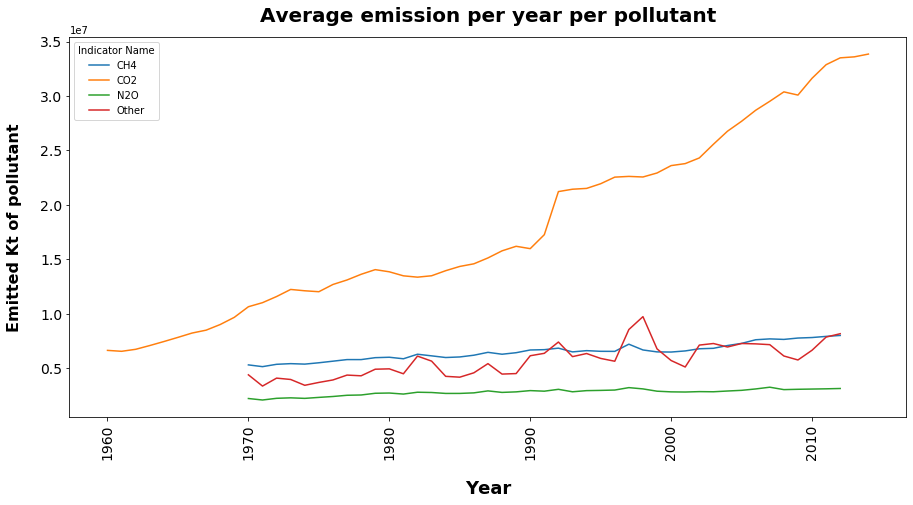

In [364]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
new_C_em.groupby(["Year","Indicator Name"]).sum()["Indicator Value"].unstack().plot(ax=ax)

ax.set_xlabel("Year", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Emitted Kt of pollutant", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Average emission per year per pollutant', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

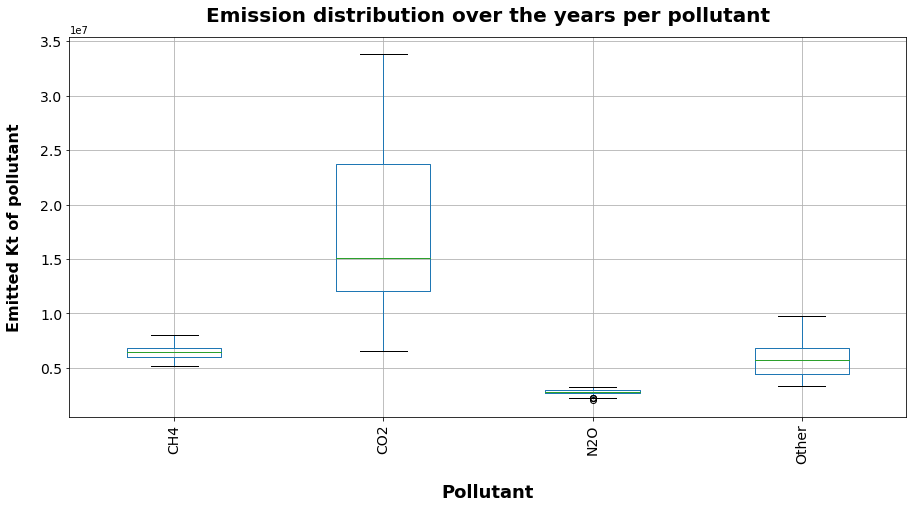

In [365]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
new_C_em.groupby(["Year","Indicator Name"]).sum()["Indicator Value"].unstack().boxplot(ax=ax)

ax.set_xlabel("Pollutant", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Emitted Kt of pollutant", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Emission distribution over the years per pollutant', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

**Answer.**
We can clearly see an increasing trend in CO2 emissions over the years, a stagnated amount of N2O emissions, and a slightly increasing trend of the CH4 pollutant. The Other pollutants have had an oscillating behavior over the years but increasing in average. Moreover, we see a lot of dispersion in the CO2, showing that there are some very big contributors of the CO2 emissions and others that contribute much less than the average. This is also true for the Other pollutants, although in a much lower scale than for CO2.

---------

#### 7.2

What can you say about the *distribution* of emissions around the globe over the years? What information can you extract from the *tails* of these distributions over the years?

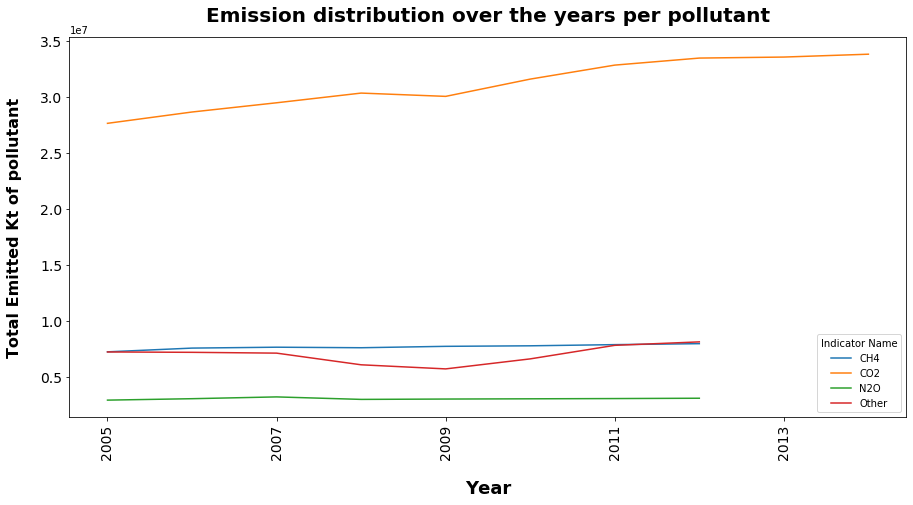

Indicator Name,CH4,CO2,N2O,Other
Year,,,,
2005,7.264921e+06,2.767461e+07,2.952155e+06,7.254516e+06
2006,7.599437e+06,2.868555e+07,3.079872e+06,7.221855e+06
2007,7.679050e+06,2.950953e+07,3.239894e+06,7.149343e+06
2008,7.631697e+06,3.037559e+07,3.017815e+06,6.108045e+06
2009,7.756665e+06,3.008176e+07,3.048767e+06,5.741876e+06
2010,7.803899e+06,3.162387e+07,3.070361e+06,6.636214e+06
2011,7.908395e+06,3.287423e+07,3.091783e+06,7.846500e+06
2012,7.995216e+06,3.350237e+07,3.121395e+06,8.154629e+06
2013,NaN,3.359335e+07,NaN,NaN


In [367]:
exp3 = pd.DataFrame(new_C_em.groupby(["Year","Indicator Name"]).sum()["Indicator Value"]).reset_index()
exp3 = exp3.pivot(index="Year",columns="Indicator Name",values="Indicator Value")#.fillna(0)

# plot data

fig, ax = plt.subplots(figsize=(15,7))
exp3.tail(10).plot(ax=ax)

ax.set_xlabel("Year", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Total Emitted Kt of pollutant", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Emission distribution over the years per pollutant', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)


plt.show()
exp3.tail(10)

**Answer.**
Over the last 10 years, we can observe a very slow increase in the CH4 and a stagnated value of the N2O emissions. The Other pollutants had a peak in 2012 and 2011 after having a very stable behavior since 2005. The CO2, keeps growing every year at a higher rate than any other pollutant. Although, from 2010 until 2014, the growing rate of the CO2 emissions has decreased.

---------

#### 7.3
Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the ```Emissions_R_df``` data frame. The main regions are ```'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific'``` and ```'North America'```. What conclusions can you make?

In [597]:
main_regions = ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 
                'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific','North America']

new_R_em = Emissions_R_df[(Emissions_R_df["Country Name"].isin(main_regions)) & (Emissions_R_df["Indicator Name"].isin(["CO2","CH4","N2O","Other"]))]
exp4 = pd.DataFrame(new_R_em.groupby(["Year", "Indicator Name"])["Indicator Value"].describe())

exp5 = pd.DataFrame(new_R_em.groupby(["Year","Indicator Name"]).sum()["Indicator Value"]).reset_index()
exp5 = exp5.pivot(index="Year",columns="Indicator Name",values="Indicator Value")#.fillna(0)

exp6 = pd.DataFrame(new_R_em.groupby(["Year","Country Name"]).sum()["Indicator Value"]).reset_index()
exp6 = exp6.pivot(index="Year",columns="Country Name",values="Indicator Value")#.fillna(0)

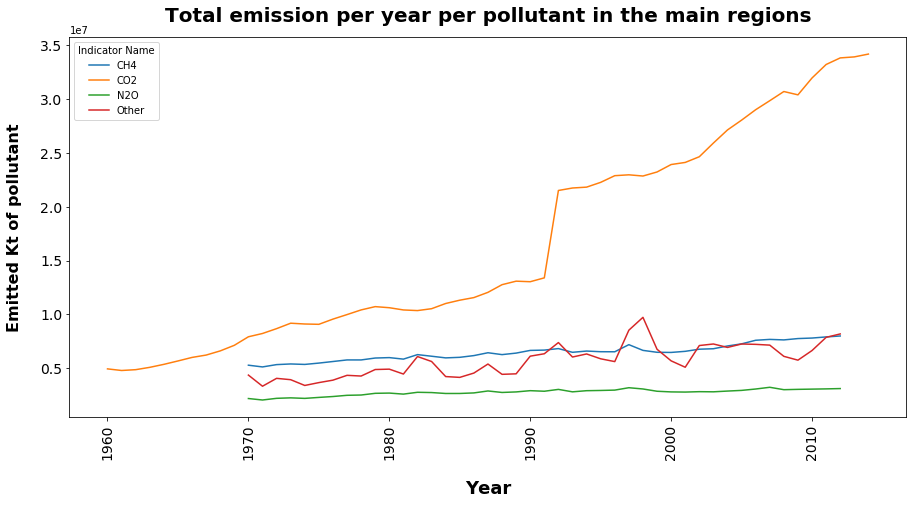

In [594]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
new_R_em.groupby(["Year","Indicator Name"]).sum()["Indicator Value"].unstack().plot(ax=ax)

ax.set_xlabel("Year", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Emitted Kt of pollutant", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Total emission per year per pollutant in the main regions', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()


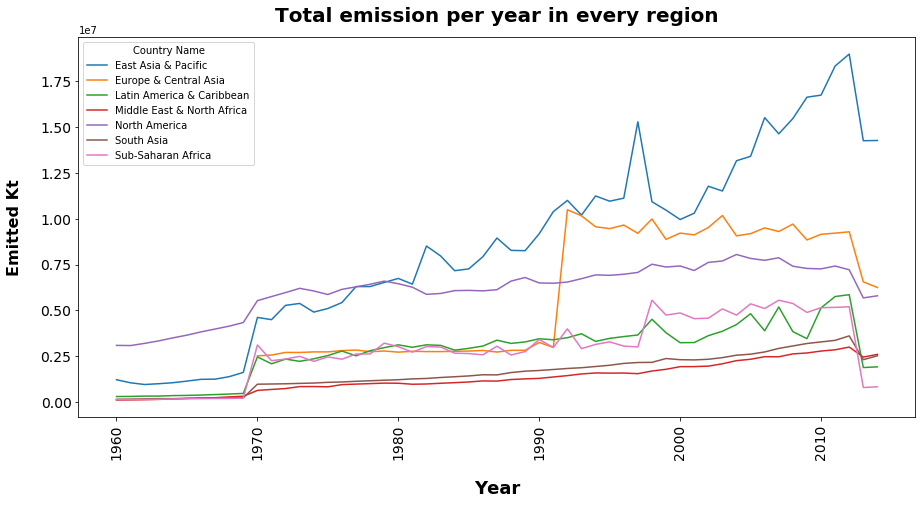

In [394]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
new_R_em.groupby(["Year","Country Name"]).sum()["Indicator Value"].unstack().plot(ax=ax)

ax.set_xlabel("Year", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Emitted Kt", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Total emission per year in every region', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

In [479]:
exp6.tail(5)

Country Name,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2010,1.674804e+07,9.151010e+06,5.132061e+06,2.774660e+06,7.260385e+06,3.273895e+06,5.143315e+06
2011,1.833686e+07,9.212408e+06,5.751655e+06,2.843093e+06,7.418730e+06,3.358848e+06,5.159888e+06
2012,1.898926e+07,9.285957e+06,5.852386e+06,2.992122e+06,7.211173e+06,3.602839e+06,5.191390e+06
2013,1.425814e+07,6.551569e+06,1.874742e+06,2.445354e+06,5.676780e+06,2.302942e+06,7.841092e+05
2014,1.427211e+07,6.245992e+06,1.912532e+06,2.593274e+06,5.792049e+06,2.516435e+06,8.228190e+05


In [403]:
exp7 = pd.DataFrame(new_R_em.groupby(["Year","Indicator Name","Country Name"]).sum()["Indicator Value"]).reset_index()
# exp5 = exp5.pivot(index="Year",columns="Indicator Name",values="Indicator Value")#.fillna(0)
exp7

,Year,Indicator Name,Country Name,Indicator Value
0,1960,CO2,East Asia & Pacific,1.210072e+06
1,1960,CO2,Latin America & Caribbean,2.912526e+05
2,1960,CO2,Middle East & North Africa,1.022525e+05
3,1960,CO2,North America,3.083749e+06
4,1960,CO2,South Asia,1.394877e+05
...,...,...,...,...
1251,2014,CO2,Latin America & Caribbean,1.912532e+06
1252,2014,CO2,Middle East & North Africa,2.593274e+06
1253,2014,CO2,North America,5.792049e+06
1254,2014,CO2,South Asia,2.516435e+06


In [441]:
exp7[exp7["Country Name"] == place]

,Year,Indicator Name,Country Name,Indicator Value
3,1960,CO2,North America,3.083749e+06
9,1961,CO2,North America,3.074864e+06
15,1962,CO2,North America,3.194551e+06
21,1963,CO2,North America,3.330490e+06
27,1964,CO2,North America,3.493998e+06
...,...,...,...,...
1225,2012,CO2,North America,5.637371e+06
1232,2012,N2O,North America,3.223124e+05
1239,2012,Other,North America,6.448032e+05
1246,2013,CO2,North America,5.676780e+06


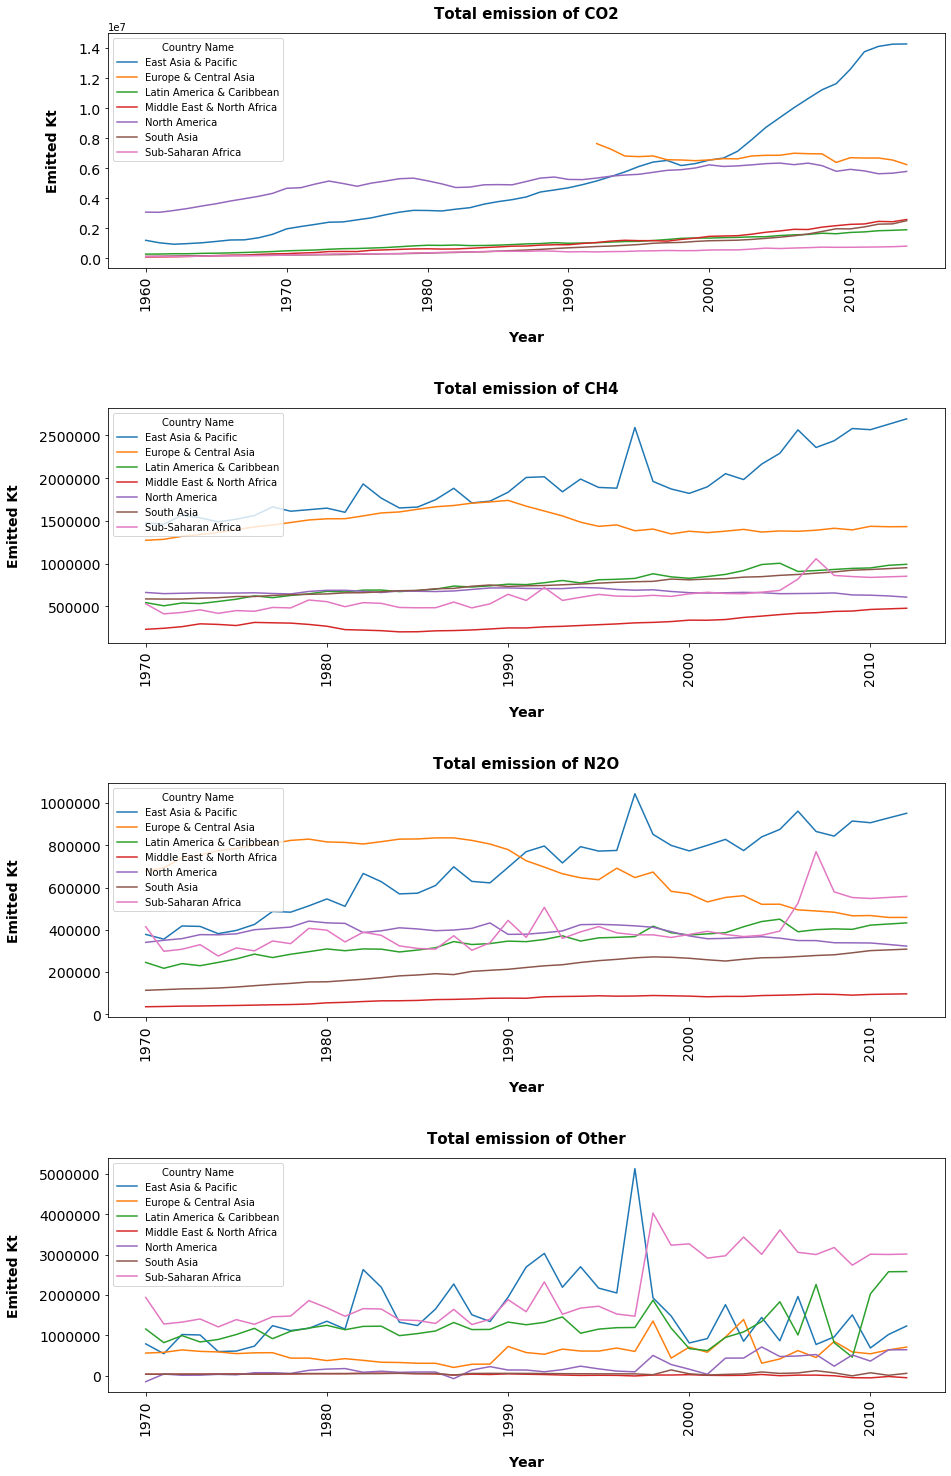

In [494]:
A = new_R_em.groupby(["Year","Country Name","Indicator Name"]).sum()["Indicator Value"].unstack(level=1).reset_index(level=1)
ind = ["CO2","CH4","N2O","Other"]
# plot data
fig, ax = plt.subplots(4,figsize=(15,25))
fig.subplots_adjust(hspace=0.6)

for i in range(len(ind)):
    
    A[A["Indicator Name"]==ind[i]].plot(ax=ax[i])

    ax[i].set_xlabel("Year", labelpad=20, fontsize=14, fontweight='bold')
    ax[i].set_ylabel("Emitted Kt", labelpad=18, fontsize=14, fontweight='bold')
    ax[i].set_title('Total emission of {0}'.format(ind[i]), fontsize=15, fontweight='bold', pad=15)
    ax[i].tick_params(axis='x', rotation=90, labelsize =14)
    ax[i].tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

**Answer.**
We can see that East Asia & Pacific is by far the region that has emitted most of the CO2, N2O and CH4 during the past decade. Despite this, all of the regions have decreased the rate at which CO2 is emitted, except for South Asia and Middle, East and North Africa.

We can also note a decrease in the emission of CO2 for North America and Europe & Central Asia since 2000.

East Asia & Pacific has been increased the emission of CH4. Middle, East and North Africa, Latin America & Caribbean, Sub-Saharan Africa and South Asia also exhibit increasing emissions of CH4 while North America and Europe & Central Asia have been decreasing their emissions for over 20 years.

In the case of N2O, North America and Europe & Central Asia have also been decreasing their emissions for over 20 years. But while Sub-saharan Africa shows a low and stable emission of N2O for the whole recorded history, the rest of the regions exhibit a continuous increase in the emissions of this gas over the years.

The Other category show a very stable stabilization of the emission of other pollutants for every region since 2012, except for East Asia & Pacific, which shows increasing emissions since 2010. Nevertheless, Sub-Saharan Africa and Latin America & Caribbean are still the top emitters of Other pollutants by far.

From the previous plots, we can clearly notice how East Asia & Pacific is the most emitting region by far and their trends do not show very promising results, except for CO2. East Asia & Pacific emits around the same amount of CO2 that North America and Europe & Central Asia emit together.

---------

### Exercise 8:

In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. 

#### 8.1
Which are the top five countries that have been in the top 10 of ```CO2``` emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?

In [624]:
B = new_C_em[(new_C_em["Year"]>="2005") & (new_C_em["Indicator Name"]=="CO2")]
B = B.groupby(["Year","Country Name"]).sum()["Indicator Value"].reset_index(level="Year")

B.sort_values(by=["Year","Indicator Value"],inplace=True,ascending=False)
# B = B[B["Year"]>"2010"].groupby('Year').head(10)
B = B[B["Year"]>="2005"].groupby('Year').head(10).reset_index()
B5 = B.groupby('Year').head(5)
B_pivot = B5.pivot(index="Year",columns = "Country Name", values="Indicator Value")
B_pivot

Country Name,China,India,Japan,Russian Federation,United States
Year,,,,,
2005,5.896958e+06,1222563.132,1239255.316,1615089.813,5789727.291
2006,6.529292e+06,1303717.509,1231495.944,1669262.404,5697285.888
2007,7.030798e+06,1407607.286,1252229.162,1666886.188,5789030.561
2008,7.553070e+06,1568379.567,1210135.669,1714978.893,5614110.994
2009,8.001009e+06,1738645.711,1103869.676,1574045.082,5263505.457
2010,8.776040e+06,1719690.988,1171624.835,1670531.186,5395532.125
2011,9.733538e+06,1841776.419,1191074.603,1763405.295,5289680.503
2012,1.002857e+07,2018503.817,1230168.490,1830830.424,5119436.361
2013,1.025801e+07,2034752.294,1246515.976,1778561.006,5159160.972


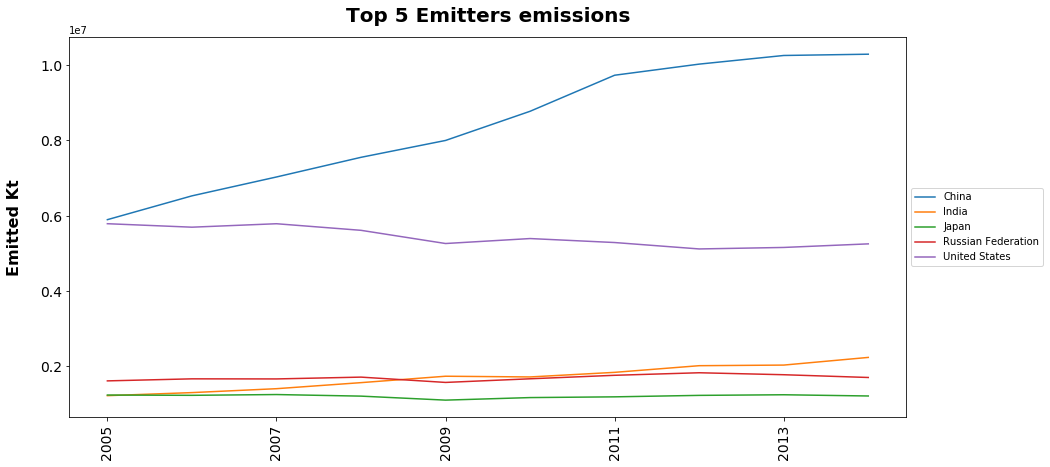

In [628]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
B_pivot.plot(ax=ax)

ax.set_xlabel("", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Emitted Kt", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Top 5 Emitters emissions', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

**Answer.**
In the plot above, we can see how the top 5 from the top 10 emitters of CO2 over the last 10 years have behaved in terms of CO2. We can see, in fact, that Japan, Russian Federation and India have remained quite stable over the decade. Despite this, they have remained in the top 5.

We can also note that United States has been decreasing their emissions slowly but persistently every year. 

Finally, China shows a steep increase in emissions from 2005 to 2011 and decreased the rate after 2011 but their emissions still increased every year after 2011.

---------

#### 8.2

Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?

In [640]:
D = new_C_em[(new_C_em["Year"]>="2005") & (new_C_em["Indicator Name"]=="CO2")]
D = D.groupby(["Year","Country Name"]).sum()["Indicator Value"].reset_index(level="Year")

D.sort_values(by=["Year","Indicator Value"],inplace=True,ascending=False)
D = D[D["Year"]>="2005"].groupby('Year').head(30).reset_index()
D_pivot = D.pivot(index="Year",columns = "Country Name", values="Indicator Value")
# D_pivot

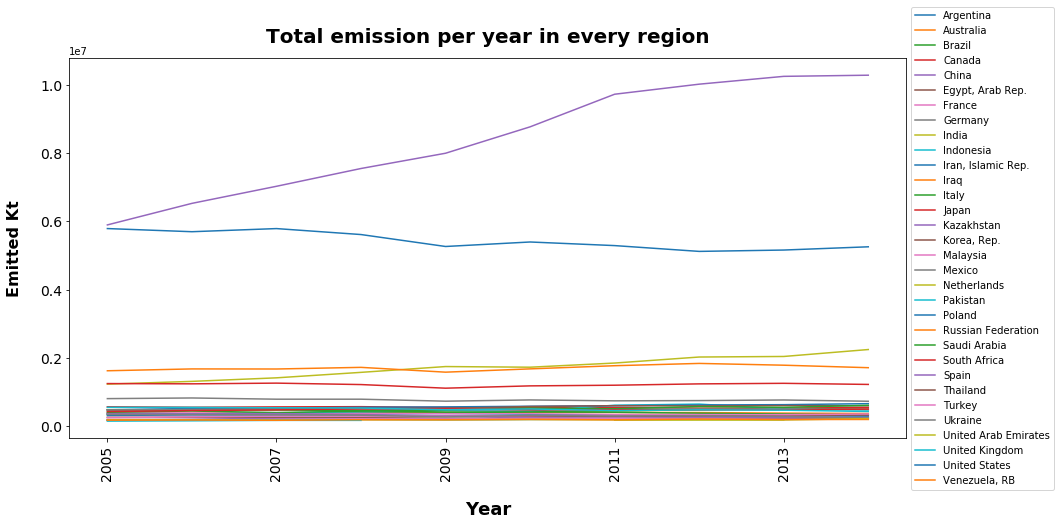

In [641]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
D_pivot.plot(ax=ax)

ax.set_xlabel("Year", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("Emitted Kt", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Total emission per year in every region', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

**Answer.**
In the previous plot we see how the top 30 emitters have behaved over the last decade. It is noticeable that the CO2 emissions have remained stable for most of the countries. In fact, The most noticeable decrease in emissions is shown by the United States. From the plot done per regions, we can also note that the decrease in emissions of Europe & Central Asia is due to little contributions of every country while the high emissions of East Asia & Pacific are mainly done by China.

---------

## The health impacts of air pollution

### Exercise 9:

One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The ```PM2.5``` indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The ```PM2.5_WHO``` measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher ```PM2.5_WHO``` indicator are more likely to suffer from bad health conditions. 


#### 9.1

The client would like to know if there is any relationship between the ```PM2.5_WHO``` indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?

**Hint:** The DataFrame ```WDI_countries``` contains a column named ```Income Group```. 

In [785]:
pm25_df = Emissions_C_df[Emissions_C_df["Indicator Name"]=="PM2.5WHO"]
income_lvl = list(WDI_ctry["Income Group"].dropna().unique())
income_df = WDI_ctry[["Country Code","Income Group"]]
# income_df
pm25_df = pd.merge(pm25_df,income_df,on='Country Code')
pm25_df[pm25_df["Income Group"]=="Low income"]
print(pm25_df["Indicator Value"].describe())
pm25_df

count    2328.000000
mean       92.609616
std        22.671226
min         0.000000
25%        99.981571
50%       100.000000
75%       100.000000
max       100.000000
Name: Indicator Value, dtype: float64


,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value,Income Group
0,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,1990,100.0,Low income
1,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,1995,100.0,Low income
2,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,2000,100.0,Low income
3,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,2005,100.0,Low income
4,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,2010,100.0,Low income
...,...,...,...,...,...,...,...
2323,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2013,100.0,Lower middle income
2324,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2014,100.0,Lower middle income
2325,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2015,100.0,Lower middle income
2326,Zimbabwe,PM2.5WHO,ZWE,EN.ATM.PM25.MC.ZS,2016,100.0,Lower middle income


In [786]:
# B = new_C_em[(new_C_em["Year"]>="2005") & (new_C_em["Indicator Name"]=="CO2")]
K = pm25_df.groupby(["Year","Income Group"]).mean()["Indicator Value"].reset_index(level="Year")

K.sort_values(by=["Year","Indicator Value"],inplace=True,ascending=False)
K = K.groupby(['Year',"Income Group"]).head(40).reset_index()
# B5 = B.groupby('Year').head(5)
K_pivot = K.pivot(index="Year",columns = "Income Group", values="Indicator Value").fillna(method="ffill").fillna(method="bfill")
K_pivot

Income Group,High income,Low income,Lower middle income,Upper middle income
Year,,,,
1990,81.311801,100.0,99.877006,99.607642
1995,80.458636,100.0,99.869046,99.591033
2000,82.052048,100.0,99.880385,99.615416
2005,81.740084,100.0,99.927515,99.639886
2010,81.663394,100.0,99.882964,99.660699
2011,83.066747,100.0,99.922447,99.684844
2012,78.927800,100.0,99.943929,99.563078
2013,77.633484,100.0,99.816060,99.405411
2014,71.552375,100.0,99.752172,97.328115


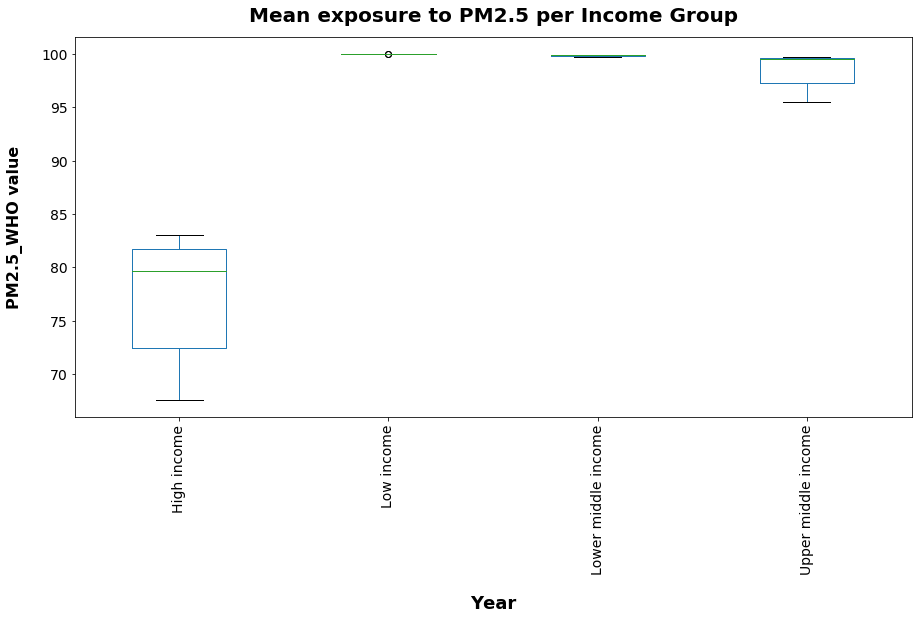

In [787]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
K_pivot.plot.box(ax=ax)

ax.set_xlabel("Year", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("PM2.5_WHO value", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Mean exposure to PM2.5 per Income Group', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

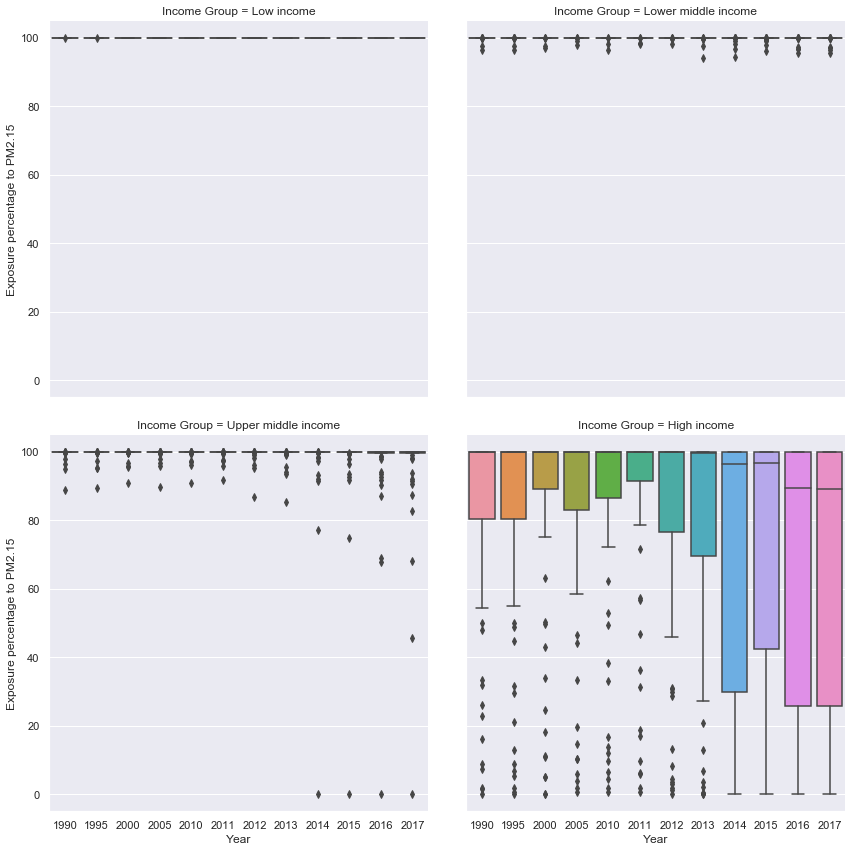

In [952]:
sns.set(font_scale=1)
g = sns.catplot(x="Year", y="Indicator Value",
                 col="Income Group",
                data=pm25_df, kind="box",
                height=6, aspect=1, col_wrap = 2);
g.set_axis_labels("Year", "Exposure percentage to PM2.15");
g.fig.subplots_adjust(wspace=.1, hspace=.1);

**Answer.**

I would mainly recommend plotting the PM2.5WHO indicator per income group over the years. This would allow us to see not only the evolution of this indicator over time but also compare how spread the data is in every income group and how this evolves over the years.

I would also suggest a plot to check the mean behaviour of the data for every income group in all the years that exist record of it. This gives a more general overview of the PM2.5WHO.

---------

#### 9.2

What do you think are the causes behind the results in Exercise 9.1?

**Answer.**
I believe there are plenty of causes for the results shown in the boxplot.

It is likely that in lower income countries, people cannot choose where to live and are probably located in places where there is more exposure to PM2.5.

Also, in lower income countries, it might happen that the policies that are intended to control PM2.5 exposure are weaker than in higher income countries. 

---------

### Exercise 10:

Finally, our client is interested in investigating the impacts and relationships between **high levels of exposure to particle matter** and **the health of the population**. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the ```WDIdata.csv``` file and work with that. 

#### 10.1

Which indicators present in the file  ```WDISeries.csv``` file might be useful to solve the client's question? Explain.

**Note:** Naming one or two indicators is more than enough for this question. 

In [708]:
health_topic=list()
topics = list(WDI_ids["Topic"].unique())
for elem in topics:
    if "health" in elem.lower():
        print(elem)
        health_topic.append(elem)

Gender: Health
Health: Risk factors
Health: Nutrition
Health: Disease prevention
Health: Mortality
Health: Reproductive health
Health: Health systems
Health: Universal Health Coverage
Health: Population: Dynamics
Health: Population: Structure


In [715]:
WDI_ids[WDI_ids["Topic"] == "Health: Mortality"]["Indicator Name"].unique()

array(['Number of deaths ages 5-14 years', 'Number of infant deaths',
       'Number of under-five deaths', 'Number of neonatal deaths',
       'Probability of dying at age 5-14 years (per 1,000 children age 5)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Mortality rate, under-5, female (per 1,000 live births)',
       'Mortality rate, under-5, male (per 1,000 live births)',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)',
       'Mortality rate, neonatal (per 1,000 live births)',
       'Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)',
       'Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)',
   

In [717]:
WDI_ids[WDI_ids["Indicator Name"] == 'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
986,SH.STA.AIRP.P5,Health: Mortality,Mortality rate attributed to household and amb...,NaN,Mortality rate attributed to household and amb...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Health Organization, Global Health Obser...",NaN,Air pollution is one of the biggest environmen...,NaN,NaN,NaN,CC BY-4.0,NaN


**Answer.**
From the previous exploration, 'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)' seems to be an adequate indicator to explore. This indicator has the code: SH.STA.AIRP.P5

The mortality rates per gender and seggretated by age can also provide valuable information. We will explore initially only the first indicator mentioned.

---------

#### 10.2

Use the indicators provided in Exercise 10.1 to give valuable information to the client. 

In [929]:
health_df = Emissions_C_df[Emissions_C_df["Indicator Name"]=="PM2.5WHO"]
health_id = WDI_data[WDI_data["Indicator Code"]=="SH.STA.AIRP.P5"]

health_id = pd.melt(health_id, id_vars=["Country Name","Country Code", "Indicator Code"], var_name = "Year", value_name = "Indicator Value")
health_id = health_id[["Country Code","Year","Indicator Value"]]
health_id.rename(columns={"Indicator Value": "Indicator Value MR"},inplace=True)
health_df.rename(columns={"Indicator Value": "Indicator Value PM2.5"},inplace=True)
health_id

pm25_vs_health = pd.merge(health_df,health_id,on=['Country Code',"Year"])

print(pm25_vs_health["Indicator Value MR"].isna().sum())

print(pm25_vs_health.dropna()["Year"].unique())
pm25_vs_health.dropna(inplace=True)
pm25_vs_health["Indicator Value MR"] = pd.to_numeric(pm25_vs_health["Indicator Value MR"], errors='coerce')
# print(pm25_vs_health["Indicator Value MR"].unique())

print(pm25_vs_health["Indicator Value MR"].describe())
health_df
health_id
pm25_vs_health

2145
['2016']
count    183.000000
mean      92.212568
std       71.934490
min        7.000000
25%       33.750000
50%       68.600000
75%      147.000000
max      324.100000
Name: Indicator Value MR, dtype: float64


,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value PM2.5,Indicator Value MR
10,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,2016,100.00000,211.1
22,Angola,PM2.5WHO,AGO,EN.ATM.PM25.MC.ZS,2016,100.00000,118.5
34,Albania,PM2.5WHO,ALB,EN.ATM.PM25.MC.ZS,2016,100.00000,68.0
58,United Arab Emirates,PM2.5WHO,ARE,EN.ATM.PM25.MC.ZS,2016,100.00000,54.7
70,Argentina,PM2.5WHO,ARG,EN.ATM.PM25.MC.ZS,2016,94.13946,26.6
...,...,...,...,...,...,...,...
2278,Samoa,PM2.5WHO,WSM,EN.ATM.PM25.MC.ZS,2016,100.00000,85.0
2290,"Yemen, Rep.",PM2.5WHO,YEM,EN.ATM.PM25.MC.ZS,2016,100.00000,194.2
2302,South Africa,PM2.5WHO,ZAF,EN.ATM.PM25.MC.ZS,2016,100.00000,86.7
2314,Zambia,PM2.5WHO,ZMB,EN.ATM.PM25.MC.ZS,2016,100.00000,127.2


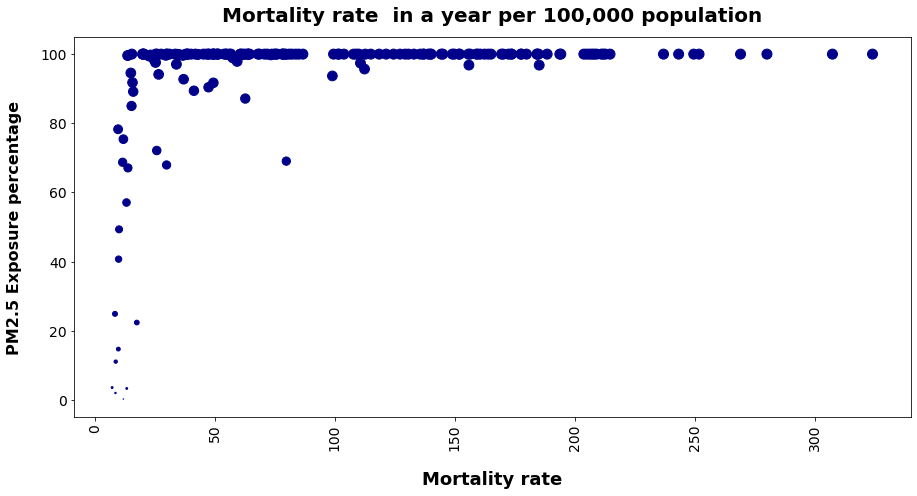

In [847]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
pm25_vs_health.plot.scatter(x='Indicator Value MR',
                      y='Indicator Value PM2.5',
                      c='DarkBlue', ax=ax, s=pm25_vs_health["Indicator Value PM2.5"])
ax.set_xlabel("Mortality rate", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("PM2.5 Exposure percentage", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Mortality rate  in a year per 100,000 population', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [917]:
# pm25_vs_health[pm25_vs_health["Indicator Value MR"]>20]

**Answer.**
In the available data, we only have information for the year 2016. Despite the shortage of information, we can see a that most of the data is scattered near the highest values of the PM2.5WHO indicator. This indicates that we should seggregate the data further to capture possible patterns.

It is also important to note that, since we only have data for 2016, an interpolation of the missing values was not possible. In order to be able to proceed with the analysis, it was necessary to remove the rows that did not have a value for the Mortality rate indicator.

---------

#### 10.3

Extend the analysis above to find some countries of interest. These are defined as

* The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure
* The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure

In [906]:
# bins = pd.IntervalIndex.from_tuples([(0, 60), (60, 100)])
pm25_vs_health['MR_band'] = pd.cut(pm25_vs_health['Indicator Value MR'], bins=[0,50,400], labels=["Low","High"])
pm25_vs_health['PM_band'] = pd.cut(pm25_vs_health['Indicator Value PM2.5'], bins=[0,95,100], labels=["Low","High"])

pm25_vs_health[pm25_vs_health['PM_band']=="Low"].shape

(29, 9)

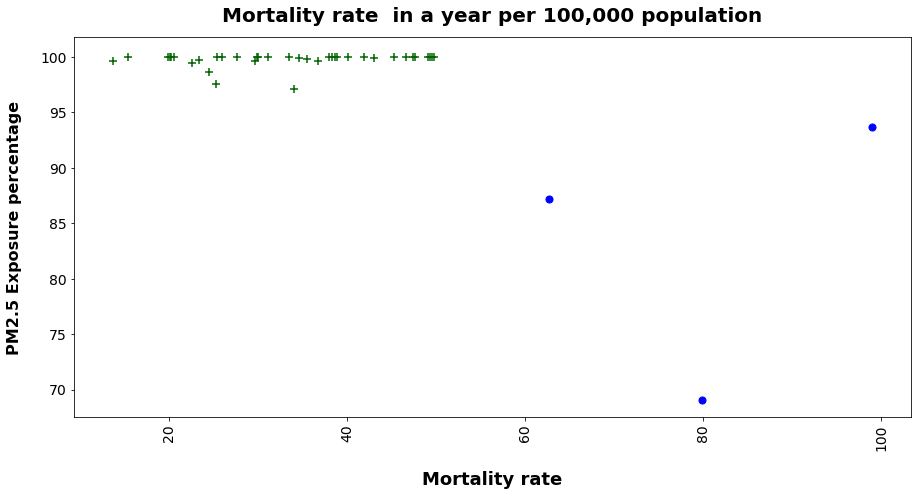

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value PM2.5,Indicator Value MR,MR_band,PM_band
718,Fiji,PM2.5WHO,FJI,EN.ATM.PM25.MC.ZS,2016,93.694055,99.0,High,Low
1102,Kazakhstan,PM2.5WHO,KAZ,EN.ATM.PM25.MC.ZS,2016,87.152381,62.7,High,Low
1246,Sri Lanka,PM2.5WHO,LKA,EN.ATM.PM25.MC.ZS,2016,69.062963,79.8,High,Low


In [905]:
fig, ax = plt.subplots(figsize=(15,7))

pm25_vs_health[(pm25_vs_health["MR_band"] =="High") & (pm25_vs_health["PM_band"] =="Low")].plot.scatter(x='Indicator Value MR',
                      y='Indicator Value PM2.5',
                      c='blue', ax=ax, s=50, marker = 'o')
pm25_vs_health[(pm25_vs_health["MR_band"] =="Low") & (pm25_vs_health["PM_band"] =="High")].plot.scatter(x='Indicator Value MR',
                      y='Indicator Value PM2.5',
                      c='darkgreen', ax=ax, s=50, marker = '+')
ax.set_xlabel("Mortality rate", labelpad=20, fontsize=18, fontweight='bold')
ax.set_ylabel("PM2.5 Exposure percentage", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Mortality rate  in a year per 100,000 population', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

pm25_vs_health[(pm25_vs_health["MR_band"] =="High") & (pm25_vs_health["PM_band"] =="Low")]

In [909]:
pm25_vs_health[(pm25_vs_health["MR_band"] =="Low") & (pm25_vs_health["PM_band"] =="Low")].shape
pm25_vs_health[(pm25_vs_health["MR_band"] =="High") & (pm25_vs_health["PM_band"] =="High")].shape

(111, 9)

**Answer.**
We can confirm what was clear from the plot in exercise 10.2. Since most of the countries such a high exposure to PM2.5, it is not possible to find countries that satisfied the conditions we wanted to explore.

If we consider an exposure to PM2.5 below 95% to be low, and a mortality rate above 50 to be high, we find that only Fiji, Kazakhstan and Sri Lanka meet these criteria. On the other hand, the list of countries with an exposure to PM2.5 above 95% and a mortality rate below 50 is quite long, as there are 29.

Nevertheless, it is the majority of countries that have a high exposure to PM2.5 and their mortality rate goes from 50 to 350, 111 to be precise. While only 26 countries have a lower exposure than 95% and a mortality rate below 50. This is important because 95% is a tremendously high threshold.



---------

#### 10.4

Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.

In [938]:
health_income = pd.merge(pm25_df,pm25_vs_health,on=["Country Name","Indicator Name","Indicator Code",'Country Code','Year'])
health_income

,Country Name,Indicator Name,Country Code,Indicator Code,Year,Indicator Value,Income Group,Indicator Value PM2.5,Indicator Value MR
0,Afghanistan,PM2.5WHO,AFG,EN.ATM.PM25.MC.ZS,2016,100.00000,Low income,100.00000,211.1
1,Angola,PM2.5WHO,AGO,EN.ATM.PM25.MC.ZS,2016,100.00000,Lower middle income,100.00000,118.5
2,Albania,PM2.5WHO,ALB,EN.ATM.PM25.MC.ZS,2016,100.00000,Upper middle income,100.00000,68.0
3,United Arab Emirates,PM2.5WHO,ARE,EN.ATM.PM25.MC.ZS,2016,100.00000,High income,100.00000,54.7
4,Argentina,PM2.5WHO,ARG,EN.ATM.PM25.MC.ZS,2016,94.13946,Upper middle income,94.13946,26.6
...,...,...,...,...,...,...,...,...,...
178,Samoa,PM2.5WHO,WSM,EN.ATM.PM25.MC.ZS,2016,100.00000,Upper middle income,100.00000,85.0
179,"Yemen, Rep.",PM2.5WHO,YEM,EN.ATM.PM25.MC.ZS,2016,100.00000,Low income,100.00000,194.2
180,South Africa,PM2.5WHO,ZAF,EN.ATM.PM25.MC.ZS,2016,100.00000,Upper middle income,100.00000,86.7
181,Zambia,PM2.5WHO,ZMB,EN.ATM.PM25.MC.ZS,2016,100.00000,Lower middle income,100.00000,127.2


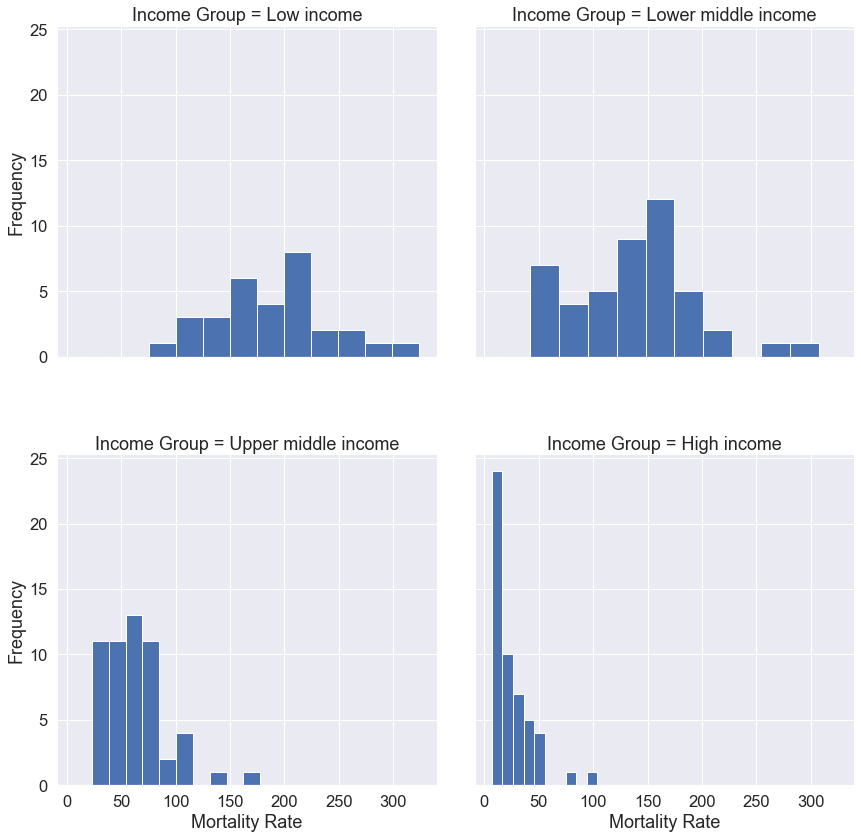

In [954]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(health_income, col="Income Group",height=6, aspect=1, col_wrap = 2);
g.map(plt.hist, "Indicator Value MR");
                
g.set_axis_labels("Mortality Rate", "Frequency");
g.fig.subplots_adjust(wspace=.1, hspace=.3);

In [961]:
for i in health_income["Income Group"].unique():
    print("\n\nThe summary statistics of Mortality rate due to household and ambient air pollution for {0} group\n".format(i))
    print(health_income[(health_income["Income Group"] == i)]["Indicator Value MR"].describe())




The summary statistics of Mortality rate due to household and ambient air pollution for Low income group

count     31.000000
mean     188.341935
std       52.959341
min       75.200000
25%      157.650000
50%      193.800000
75%      212.350000
max      324.100000
Name: Indicator Value MR, dtype: float64


The summary statistics of Mortality rate due to household and ambient air pollution for Lower middle income group

count     46.000000
mean     136.441304
std       55.566699
min       41.900000
25%      101.850000
50%      138.400000
75%      167.725000
max      307.400000
Name: Indicator Value MR, dtype: float64


The summary statistics of Mortality rate due to household and ambient air pollution for Upper middle income group

count     54.000000
mean      63.937037
std       29.618125
min       23.300000
25%       46.800000
50%       61.100000
75%       77.950000
max      177.700000
Name: Indicator Value MR, dtype: float64


The summary statistics of Mortality rate due to house

**Answer.** In the previous histograms, it can clearly be seen a relationship between the income group and the mortality rate indicator.

We can clearly see how the histogram begins skewed to the higher mortality rates when the income is low and shifts to the right as the income grows.

Also, in the summary statistics, we can see that the mean mortality rate increases with the income level. Also, the deviation of the data is much less for the highest income levels when compared to the lowest income levels.

---------

#### 10.5

At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:

1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
2. Which are the critical regions where we should start environmental campaigns?
3. Are we making any progress in the prevention of deaths related to air pollution?
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? 

**Answer.**

1. Most of the world exhibits a constant rate of emissions over the past few years. In Europe, Central Asia and The United States, the accumulated effort of each country is slowly showing results, starting a decrease in the emissions during the past decades. China together with East Asia, neverteless, represent the biggest emitters in the world and their emissions opaque the progress done by the other regions.

The data shows that the progress in reducing the amount of emitted pollutants is much slower that it needs to be.

2. China, India, Japan, Russia and the United States are the countries where more environmental campaigns and efforts should be done, because they represent a very important share of the emissions. It is important also to create campaigns all over the world, in order to avoid the increase of the emissions of the developing countries.

3. Shamefully, most of the efforts in the prevention of deaths related to air pollution are being done by the medium to high income and high income countries. Specially the high income countries, that exhibit a lower exposure of their inhabitants to PM2.5 and also show lower deaths due to air pollution. The countries with the lowest income have the highest mortality rates and exhibit, as constant, a very high exposure of their inhabitants. 

4. The income level of the country, as well as the exposure of the populatation to PM2.5 appear to have an impact on the mortality rate due to air pollution.

---------